# Principal Component Analysis (PCA)

En este cuaderno vamos ver como obtener los componentes principales de un conjunto de datos.

---
    [ES] Código de Alfredo Cuesta Infante para 'Reconocimiento de Patrones'
       @ Master Universitario en Visión Artificial, 2021, URJC (España)
    [EN] Code by Alfredo Cuesta-Infante for 'Pattern Recognition'
       @ Master of Computer Vision, 2021, URJC (Spain)

    alfredo.cuesta@urjc.es

### Preliminares 

En la siguiente celda se realizan los siguientes pasos:
1. carga de módulos genéricos
2. leer los datos y cargarlos en dataframes
2. extraer características
2. separar en TRAIN y VALID

In [1]:
#-[1]. Load data from CSV and put all in a single dataframe 'FullSet'

import numpy  as np
import pandas as pd
from matplotlib import pyplot as plt
import sys
sys.path.append('../MyUtils/')
import MyUtils as my
seed = 1234 #<- random generator seed (comment to get randomness)

#-[2]. Load data from CSV and put all in a single dataframe 'FullSet'

FullSet_0 = pd.read_csv('../Datasets/1000ceros.csv', header=None)
FullSet_1 = pd.read_csv('../Datasets/1000unos.csv',  header=None)
FullSet = my.join_features_labels(FullSet_0,FullSet_1)

#-[3]. Convert the 'FullSet' of pixels into the set 'X_full' of features and get the set 'Y_full' of labels

theta = 0.5
X_full = my.mnist_features( FullSet.drop('label', axis=1), theta=theta )
Y_full = FullSet[['label']]

#-[4]. Split X_full into TRAIN and TEST in a single Stratified split

valid_size = 0.2
X_train, Y_train, X_valid, Y_valid = \
   my.single_stratified_split( X_full,Y_full, test_size=valid_size, random_state=seed)

#-[5]. Select the features and fit a scaler to [0,1]

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

#feat_selec= ['width','height','W_max1','area','w_vs_h']
#X = scaler.fit_transform(X_train[feat_selec])
X = scaler.fit_transform(X_train)
Y = Y_train.values.ravel()   

#---> X and Y are now numpy arrays ready to train a machine !!

### Reducción de dimensiones con PCA

In [2]:
from sklearn.decomposition import PCA

n_components = .7 
if n_components <= X.shape[1]:
    pca = PCA(n_components = n_components)
    pca.fit(X)
    X_proy = pca.transform(X)
else:
    print("ERROR: the number of princial components has to be less or equal than data dimension !")

In [3]:
num_of_pc = len(pca.singular_values_)

strTitle = '\n First %d principal components' %(num_of_pc)
print(strTitle)
print(pca.components_.T)
strTitle = '\n First %d singular values ' %(num_of_pc)
print(strTitle)
print(pca.singular_values_.T)
strTitle = '\n Explained Variance Ratio'
print(strTitle)
print(pca.explained_variance_ratio_.T)
strTitle = '\n Accumulated Explained Variance Ratio'
print(strTitle)
print(np.cumsum(pca.explained_variance_ratio_.T))


 First 4 principal components
[[-0.72053978  0.14099296  0.09806254  0.02391177]
 [-0.02901181  0.06344395  0.03140595 -0.49239729]
 [ 0.01637996 -0.17129481 -0.06333128  0.59843561]
 [-0.02363329 -0.21572096 -0.01126094  0.47500013]
 [ 0.09159435 -0.00152283 -0.01868053  0.0109253 ]
 [ 0.12072815 -0.19490043  0.91191788 -0.10574672]
 [-0.12551187 -0.65095258 -0.3547148  -0.39430103]
 [-0.19150262 -0.64967772  0.14315962  0.07425613]
 [-0.63360542  0.12804603  0.08353963  0.02963686]
 [-0.04802896  0.00370373  0.0045203   0.00744809]]

 First 4 singular values 
[15.97880093 13.35201056 12.09262221 10.5375462 ]

 Explained Variance Ratio
[0.2676259  0.18686721 0.15327832 0.11639082]

 Accumulated Explained Variance Ratio
[0.2676259  0.4544931  0.60777142 0.72416225]


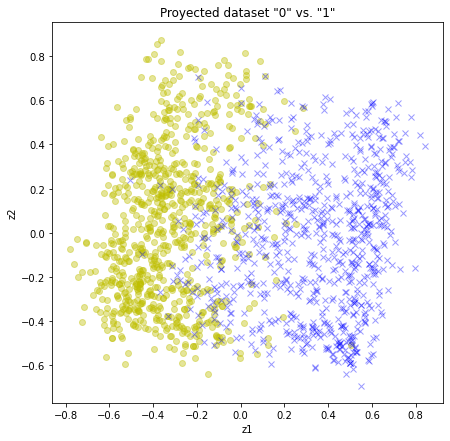

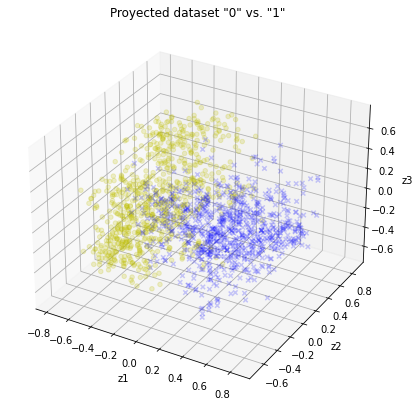

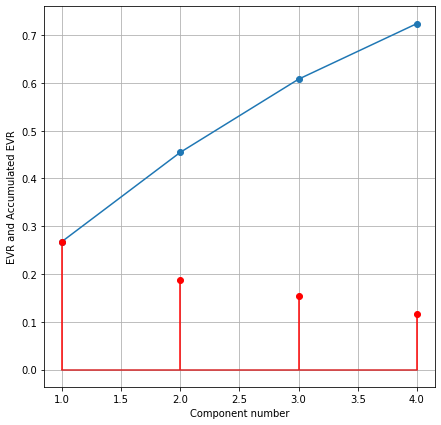

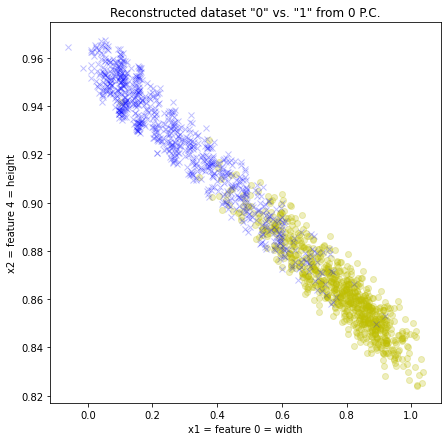

In [4]:
plt.rcParams['figure.figsize'] = [7,7] #<- this makes the figures larger in Jupyter

fig_number = 0
plot_proy2d = True
plot_proy3d = True
plot_explained_variance_ratio = True
plot_reconstructed_dataset = True

if plot_proy2d:
    fig_number=fig_number+1
    plt.figure(fig_number)
    ind0 = Y==0
    ind1 = Y==1
    plt.plot(X_proy[ind0,0],X_proy[ind0,1], 'yo', alpha=.4)
    plt.plot(X_proy[ind1,0],X_proy[ind1,1], 'bx', alpha=.4)
    plt.xlabel('z1')
    plt.ylabel('z2')
    plt.title('Proyected dataset "0" vs. "1"')

if plot_proy3d:
    from mpl_toolkits.mplot3d import Axes3D
    fig_number=fig_number+1
    fig = plt.figure(fig_number)
    ax = fig.add_subplot(111, projection='3d')
    ind0 = Y==0
    ind1 = Y==1
    ax.scatter(X_proy[ind0,0],X_proy[ind0,1],X_proy[ind0,2], c='y',marker='o', alpha=.2)
    ax.scatter(X_proy[ind1,0],X_proy[ind1,1],X_proy[ind1,2], c='b',marker='x', alpha=.2)
    ax.set_xlabel('z1')
    ax.set_ylabel('z2')
    ax.set_zlabel('z3')
    plt.title('Proyected dataset "0" vs. "1"')

if plot_explained_variance_ratio:
    fig_number = fig_number + 1
    plt.figure(fig_number)
    plt.plot(np.arange(num_of_pc)+1,np.cumsum(pca.explained_variance_ratio_.T),'-o')
    plt.stem(np.arange(num_of_pc)+1,pca.explained_variance_ratio_.T,'r',markerfmt='ro')
    plt.grid()
    plt.xlabel('Component number')
    plt.ylabel('EVR and Accumulated EVR')

if plot_reconstructed_dataset:
    X_recovered = pca.inverse_transform(X_proy)
    fig_number=fig_number+1
    plt.figure(fig_number)
    ind0 = Y==0
    ind1 = Y==1
    #plt.plot(X[ind0,0],X[ind0,4], 'yo', alpha=.25)
    #plt.plot(X[ind1,0],X[ind1,4], 'bx', alpha=.25)
    plt.plot(X_recovered[ind0,0],X_recovered[ind0,4], 'yo', alpha=.25)
    plt.plot(X_recovered[ind1,0],X_recovered[ind1,4], 'bx', alpha=.25)
    plt.xlabel('x1 = feature 0 = width')
    plt.ylabel('x2 = feature 4 = height')
    strTitle = 'Reconstructed dataset "0" vs. "1" from %d P.C.' % (n_components)
    plt.title(strTitle)

plt.show()

###  Ejercicio
+ Prueba a aprender un clasificador con los datos proyectados mediante PCA y después evalualo con el conjunto de test que tenemos separado.
+ Recuerda que el conjunto de test debe ser procesado de la misma manera que lo fué el conjunto de entrenamiento.
+ Compara los resultados con aquellos que obtuviste sin hacer PCA.